In [1]:
import numpy as np
import pandas as pd
import matplotlib as plot
import matplotlib.pyplot as plt

data = pd.read_csv('SkopjeMaraton2019.csv', delimiter = ',')
fivemale = data[(data['Marathon Type'] == '5K') & (data['Gender'] == 'M')]
fivefemale = data[(data['Marathon Type'] == '5K') & (data['Gender'] == 'F')]

#fivemale = fivemale.drop(['Bib','Name', 'Firstname', 'Gun time', 'Chip time', 'Marathon Type', 'Gender'],axis=1)

In [2]:
type(fivemale)
fivefemale

,Rank,Bib,Name,Firstname,Country,Gun time,Chip time,Chip time in minutes,Club,Marathon Type,Gender
14,1.0,4613,Marija STOJANOVSKA,Marija,MKD,0:20:49,0:20:48,20.80,DELTA,5K,F
19,2.0,7227,Anja EKLER,Anja,MKD,0:21:13,0:21:13,21.22,NaN,5K,F
26,3.0,10417,Irma HAJDARI,Irma,MKD,0:22:05,0:22:05,22.08,DM DROGERIE MARKT,5K,F
52,4.0,4991,Elena DANILOVSKA,Elena,MKD,0:24:23,0:24:22,24.37,VICOTEKA.MK,5K,F
80,5.0,7997,Liljana ALEKSOVA,Liljana,MKD,0:25:23,0:24:38,24.63,NaN,5K,F
...,...,...,...,...,...,...,...,...,...,...,...
11886,NaN,3580,Dijana GJORGIEVA,Dijana,MKD,DNS,DNS,0.00,NaN,5K,F
11887,NaN,3576,Andrijana GACOVSKI,Andrijana,MKD,DNS,DNS,0.00,NaN,5K,F
11891,NaN,3559,Sofia CIVKAROSKI,Sofia,MKD,DNS,DNS,0.00,NaN,5K,F
11892,NaN,3558,Zlatica CIVKAROSKI,Zlatica,MKD,DNS,DNS,0.00,NaN,5K,F


In [124]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

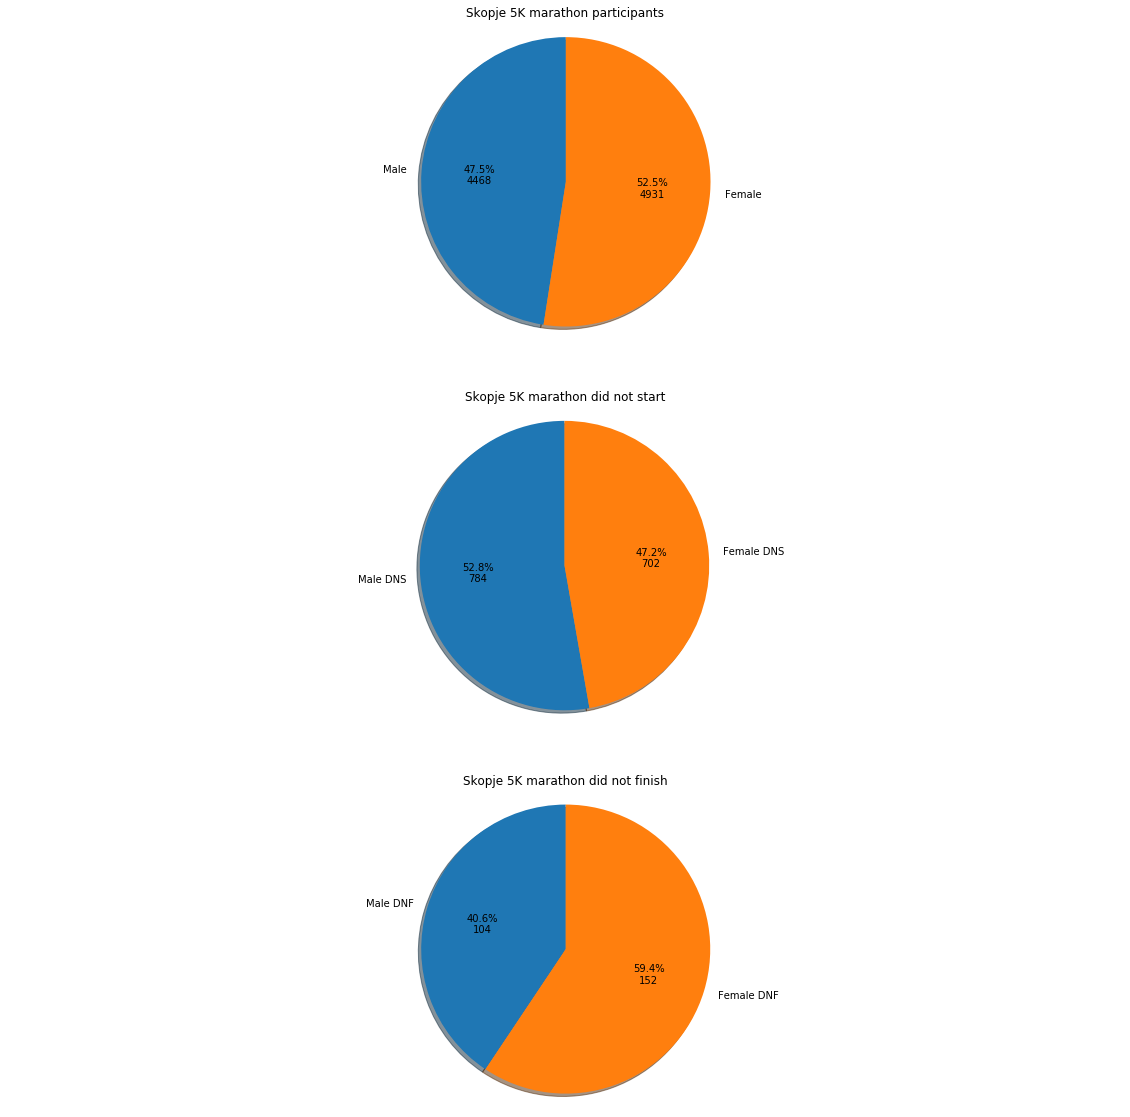

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,figsize=(20,20))

ax1.set_title('Skopje 5K marathon participants')
size_male = len(fivemale.index)
size_female = len(fivefemale.index)
X = [size_male, size_female]
labels = ['Male', 'Female']

ax1.pie(X, labels=labels, shadow=True, startangle=90, autopct=lambda pct: func(pct, X))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.set_title('Skopje 5K marathon did not start')
male_dns = len(fivemale[fivemale['Chip time'] == 'DNS'].index)
female_dns = len(fivefemale[fivefemale['Chip time'] == 'DNS'].index)
Y = [male_dns, female_dns]
labels = 'Male DNS', 'Female DNS'

ax2.pie(Y, labels=labels, shadow=True, startangle=90, autopct=lambda pct: func(pct, Y))
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax3.set_title('Skopje 5K marathon did not finish')
male_dnf = len(fivemale[fivemale['Chip time'] == 'DNF'])
female_dnf = len(fivefemale[fivefemale['Chip time'] == 'DNF'])
Z = [male_dnf, female_dnf]
labels = 'Male DNF', 'Female DNF'

ax3.pie(Z, labels=labels, shadow=True, startangle=90, autopct=lambda pct: func(pct, Z))
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

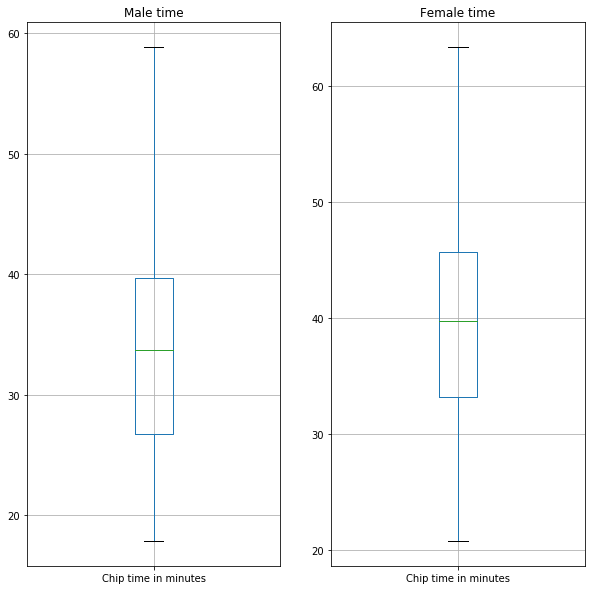

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10,10))
ax1.set_title('Male time')
ax2.set_title('Female time')
fivemale['Chip time in minutes'].dropna().to_frame().boxplot(showfliers=False, ax=ax1)
fivefemale['Chip time in minutes'].dropna().to_frame().boxplot(showfliers=False, ax=ax2)

In [133]:
data_male = fivemale['Chip time in minutes'].dropna().to_frame()
data_female = fivefemale['Chip time in minutes'].dropna().to_frame()
median_male = np.median(data_male)
median_female = np.median(data_female)
upper_quartile_male = np.percentile(data_male, 75)
upper_quartile_female = np.percentile(data_female, 75)
lower_quartile_male = np.percentile(data_male, 25)
lower_quartile_female = np.percentile(data_female, 25)

iqr_male = upper_quartile_male - lower_quartile_male
iqr_female = upper_quartile_female - lower_quartile_female
upper_whisker_male = data_male[data_male<=upper_quartile_male+1.5*iqr_male].max()[0]
upper_whisker_female = data_female[data_female<=upper_quartile_female+1.5*iqr_female].max()[0]
lower_whisker_male = data_male[data_male>=lower_quartile_male-1.5*iqr_male].min()[0]
lower_whisker_female = data_female[data_female>=lower_quartile_female-1.5*iqr_female].min()[0]

d = {'Median': [median_male, median_female], 
     'Upper Quartile': [upper_quartile_male, upper_quartile_female], 
     'Lower Quartile': [lower_quartile_male, lower_quartile_female], 
     'IQR': [iqr_male, iqr_female], 
     'Upper Whisker': [upper_whisker_male, upper_whisker_female], 
     'Lower Whisker': [lower_whisker_male, lower_whisker_female]
    }
df = pd.DataFrame(data=d, index=['Male','Female'])
df

,Median,Upper Quartile,Lower Quartile,IQR,Upper Whisker,Lower Whisker
Male,33.70,39.68,26.70,12.98,58.85,17.85
Female,39.72,45.72,33.15,12.57,63.35,20.78


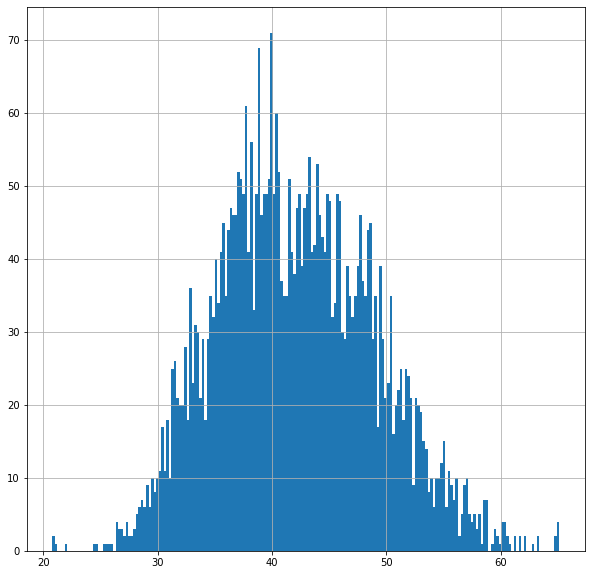

In [126]:
femaletime_hist = fivefemale[fivefemale['Chip time in minutes'] > 0.0]
femaletime_hist = femaletime_hist['Chip time in minutes']
femaletime_hist.hist(bins=200,figsize=(10,10))

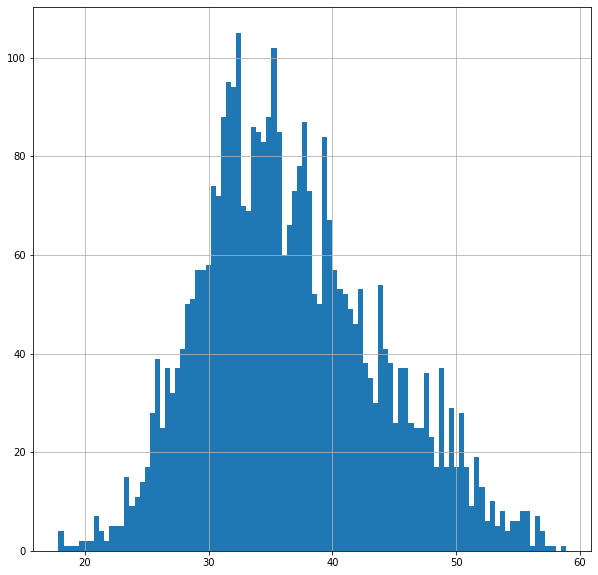

In [134]:
maletime_hist = fivemale[(fivemale['Chip time in minutes'] >= lower_whisker_male) & (fivemale['Chip time in minutes'] <= upper_whisker_male)]
maletime_hist = maletime_hist['Chip time in minutes']
maletime_hist.hist(bins=100,figsize=(10,10))

In [135]:
#Male/Female finishers
maletime = fivemale[fivemale['Chip time in minutes'] > 0]
femaletime= fivefemale[fivefemale['Chip time in minutes'] > 0.0]

#Countries by male finishers
column = maletime.Country.unique()
for i in range(0, len(column)):
    column[i] = column[i].strip()
column = np.unique(column)
row = np.ones(len(column))
row = pd.Series(row, name = "Countries")
countries = pd.DataFrame(row, columns = column)
#countries.append(row)

#Countries by female finishers
column = femaletime.Country.unique()
for i in range(0, len(column)):
    column[i] = column[i].strip()
column = np.unique(column)
row = np.ones(len(column))
row = pd.Series(row, name = "Countries")
countries_female = pd.DataFrame(row, columns = column)
#countries_female.append(row)

In [136]:
d = pd.DataFrame(index = [0])
d_f = pd.DataFrame(index = [0])

for country in countries:
    d[country] = 0
    
for country in countries_female:
    d_f[country] = 0
    
for index, row in maletime.iterrows():
    row['Country']
    country = row['Country']
    d[country] = d[country] + 1
    
for index, row in femaletime.iterrows():
    row['Country']
    country = row['Country']
    if country == 'MKD ':
        d_f['MKD'] = d_f['MKD'] +1
    else:
        d_f[country] = d_f[country] + 1
    
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

countries_f = pd.DataFrame.from_dict(d_f)
countries_finishers = pd.DataFrame.from_dict(d)
countries_finishers = countries_finishers.append(countries_f, sort = False)
countries_finishers.index = ['Male', 'Female']
countries_finishers

,ALB,AUT,BUL,CRO,CZE,DEN,ESP,FRA,GBR,GER,GRE,HUN,IND,ITA,KOS,MDA,MEX,MKD,NED,NOR,POL,ROU,RUS,SLO,SRB,SVK,SWE,TUR,USA,BRA,JPN,MNE,PHI,UKR
Male,1,2.0,4,3,1.0,1.0,5,3,3,1,2.0,1,1.0,2,1,1.0,1.0,3510,1,2.0,2,2,1,1.0,5,1,1,8,9,NaN,NaN,NaN,NaN,NaN
Female,2,NaN,3,6,NaN,NaN,1,1,1,2,NaN,1,NaN,1,2,NaN,NaN,4000,1,NaN,3,2,2,NaN,16,6,2,1,16,1.0,1.0,3.0,1.0,1.0


In [137]:
#Avg time of every country , histograms
malecountry_time = {}
for country in list(countries_finishers.columns):
    malecountry_time[country] = 0
    
for country in countries:
    total_time = maletime[maletime['Country'] == country]['Chip time in minutes'].sum()
    total_participants = len(maletime[maletime['Country'] == country])
    malecountry_time[country] = total_time / total_participants
    
malecountry_time

{'ALB': 19.47,
 'AUT': 34.04,
 'BUL': 36.865,
 'CRO': 37.63333333333333,
 'CZE': 34.5,
 'DEN': 44.12,
 'ESP': 33.501999999999995,
 'FRA': 30.983333333333334,
 'GBR': 27.30666666666667,
 'GER': 40.67,
 'GRE': 37.72,
 'HUN': 27.4,
 'IND': 44.67,
 'ITA': 31.465000000000003,
 'KOS': 26.58,
 'MDA': 30.4,
 'MEX': 41.18,
 'MKD': 36.953501424501425,
 'NED': 27.62,
 'NOR': 46.150000000000006,
 'POL': 33.0,
 'ROU': 35.875,
 'RUS': 35.2,
 'SLO': 43.73,
 'SRB': 31.053999999999995,
 'SVK': 32.63,
 'SWE': 28.18,
 'TUR': 37.65375,
 'USA': 31.79444444444444,
 'BRA': 0,
 'JPN': 0,
 'MNE': 0,
 'PHI': 0,
 'UKR': 0}

In [139]:
#Te same as above but for females
femalecountry_time = {}
for country in list(countries_finishers.columns):
    femalecountry_time[country] = 0
    
for country in countries_female:
    total_time = femaletime[femaletime['Country'] == country]['Chip time in minutes'].sum()
    total_participants = len(femaletime[femaletime['Country'] == country])
    femalecountry_time[country] = total_time / total_participants
    
femalecountry_time

{'ALB': 36.004999999999995,
 'AUT': 0,
 'BUL': 42.94,
 'CRO': 44.745,
 'CZE': 0,
 'DEN': 0,
 'ESP': 37.38,
 'FRA': 31.65,
 'GBR': 29.92,
 'GER': 33.615,
 'GRE': 0,
 'HUN': 45.9,
 'IND': 0,
 'ITA': 36.57,
 'KOS': 29.435000000000002,
 'MDA': 0,
 'MEX': 0,
 'MKD': 42.15624906226557,
 'NED': 45.22,
 'NOR': 0,
 'POL': 34.81333333333333,
 'ROU': 38.575,
 'RUS': 36.99,
 'SLO': 0,
 'SRB': 40.21625,
 'SVK': 35.99166666666667,
 'SWE': 38.25,
 'TUR': 27.78,
 'USA': 42.309375,
 'BRA': 60.48,
 'JPN': 30.92,
 'MNE': 38.51333333333333,
 'PHI': 44.35,
 'UKR': 44.0}

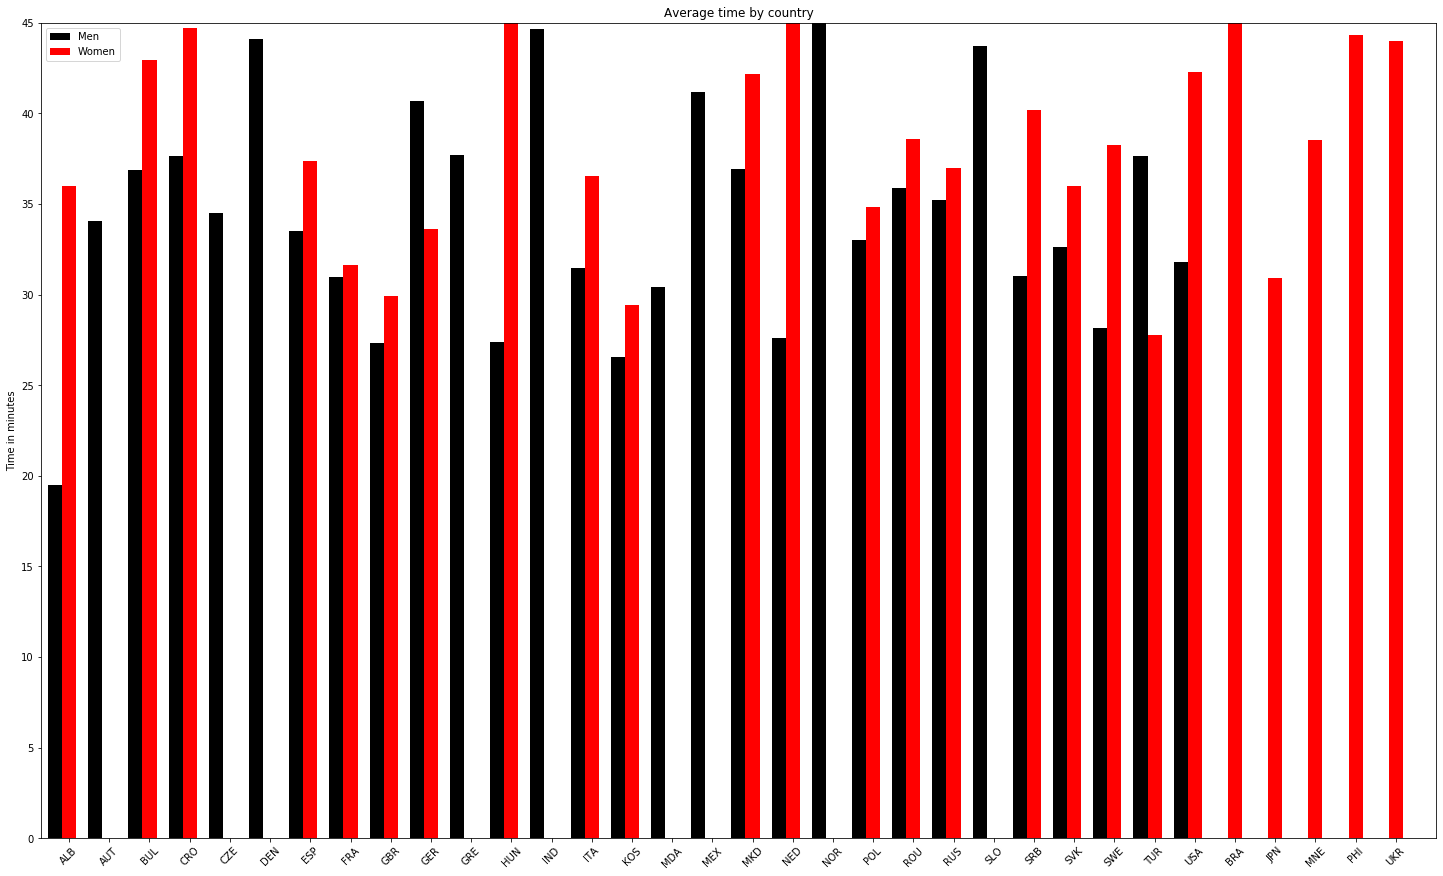

In [140]:
#remove the nan
#Create graph
N = len(list(countries_finishers.columns))
menMeans = list(malecountry_time.values())
womenMeans = list(femalecountry_time.values())

#Variables
ind = np.arange(N)
width = 0.35

fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(111)

## the bars
rects1 = ax.bar(ind, menMeans, width,
                color='black',
                error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind+width, womenMeans, width,
                    color='red',
                    error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,45)
ax.set_ylabel('Time in minutes')
ax.set_title('Average time by country')
#xTickMarks = ['Group'+str(i) for i in range(1,6)]
countries = list(femalecountry_time.keys())
xTickMarks = countries

ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

In [141]:
#same as above but for organisation
countries = list(femalecountry_time.keys())
clubs_male = maletime.Club.unique()
clubs_female = femaletime.Club.unique()

d_male = {}
for club in clubs_male:
    d_male[club] = 0

d_female = {}
for club in clubs_female:
    d_female[club] = 0
    
for club in clubs_male:
    d_male[club] = maletime[maletime['Club'] == club]['Chip time in minutes'].count()
    
for club in clubs_female:
    d_female[club] = femaletime[femaletime['Club'] == club]['Chip time in minutes'].count()
    
#club_participants
d_clubs = {}
for club in list(d_male.keys()):
    d_clubs[club] = d_male[club]
    
for club in list(d_female.keys()):
    if club in d_clubs:
        d_clubs[club] += d_female[club]
    else:
        d_clubs[club] = d_female[club]
        
d_clubs

{nan: 0,
 'FFOSZ': 2,
 'DELTA': 12,
 'AK OLIMP - BITOLA': 1,
 'BTOBET': 14,
 'ARK MARATONAC KRUSEVAC': 1,
 'TIKVES': 1,
 'SEAVUS': 108,
 'AK VARDAR': 3,
 'FON UNIVERSITY': 5,
 'ZAN MITREV CLINIC': 40,
 'NRC - NIKE + RUN CLUB': 26,
 'APTIV': 28,
 'UNIBANKA': 55,
 'B WATCH 1920': 18,
 'ALLOCATE SOFTWARE': 43,
 'DOUBLETREE BY HILTON SKOPJE': 10,
 'ALKALOID-ZDRAVJETO PRED SE': 167,
 'HALKBANK': 54,
 'ASPEKT': 17,
 'DOOZY': 1,
 'DHL TIM': 36,
 'CLIKDAQ': 11,
 'VIP-METAL TREJD': 1,
 'RUN4CYSTICFIBROSIS': 9,
 'DALGA': 1,
 'QUEHENBERGER': 7,
 'FILOZOFSKI FAKULTET SKOPJE': 24,
 'ARK LOTUS PRILEP': 4,
 'INDIVIDUAL': 1,
 'EUROMAX RESOURCES': 33,
 'GIM AD': 31,
 'NEUROMEDICA': 10,
 'GREEN POWER': 12,
 'STRABAG': 15,
 'SPORT VISION': 23,
 'PORSCHE MACEDONIA': 20,
 'MASHINSKI FAKULTET SKOPJE': 37,
 'AK VELES': 1,
 'APAVE': 22,
 'FORMIKA PLUS': 4,
 'ZMSTAM': 23,
 'EGIPETSKI MRSHOJADEC': 17,
 'KBK VIKING': 1,
 'VOENA POLICIJA&AMP;AMP;AMP;': 3,
 'SIDRO': 16,
 'VICOTEKA.MK': 2,
 'UGD UNIVERZITET GOCE DE

In [142]:
teams = sorted(d_clubs.items(), key = lambda kv:(kv[1], kv[0]))
teams.reverse()
team_list = []
count_list = []
for i in range(len(teams)):
    team_list.append(teams[i][0])
    count_list.append(teams[i][1])
    
teams_table = pd.DataFrame({
    "Teams" : team_list,
    "Participants" : count_list
})
pd.options.display.max_rows = 515
teams_table

[210,
 167,
 148,
 108,
 90,
 87,
 83,
 74,
 65,
 64,
 55,
 55,
 54,
 50,
 50,
 50,
 48,
 45,
 45,
 43,
 42,
 41,
 40,
 38,
 37,
 36,
 36,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 31,
 31,
 31,
 30,
 30,
 29,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 21,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,


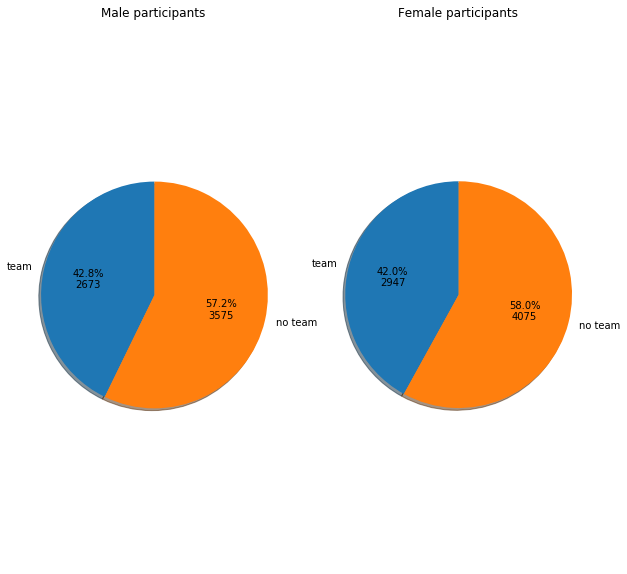

In [145]:
#ratio teams in same

noteam_male = len(maletime)
team_male = sum(d_male.values())

noteam_female = len(femaletime)
team_female = sum(d_female.values())

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10,10))
ax1.set_title('Male participants')
ax2.set_title('Female participants')

X = [team_male, noteam_male]
labels = ['team', 'no team']
ax1.pie(X, labels=labels, shadow=True, startangle=90, autopct=lambda pct: func(pct, X))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Y = [team_female, noteam_female]
labels = ['team', 'no team']
ax2.pie(Y, labels=labels, shadow=True, startangle=90, autopct=lambda pct: func(pct, Y))
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [157]:
db = pd.read_csv('Data/2016-5K-fixed.csv', delimiter = ',')
db = db.drop(labels='Unnamed: 9', axis=1)
for index, row in db.iterrows():
    if row['Chip Time'] == 'F':
        row['Chip Time'] = row['Gender']
        row['Gender'] = 'F'
    elif row['Chip Time'] == 'M':
        row['Chip Time'] = row['Gender']
        row['Gender'] = 'M'
        
female_time = db[db['Gender'] == 'F']
male_time = db[db['Gender'] == 'M']
def avg_time(data):
    ress = 0
    c = 0
    for time in data:
        parts = str(time).split(":")
        if len(parts) == 2:
            ress += float(parts[0]) + (float(parts[1])/60)
            c+=1
        elif len(parts) == 3:
            ress += float(parts[0])*60 + float(parts[1]) + float(parts[2].replace(',','.'))/60
            c+=1
    return ([ress/c, c])

top_female = avg_time(list(female_time['Chip Time'].head(1)))[0]
top_male = avg_time(list(male_time['Chip Time'].head(1)))[0]
ress = avg_time(female_time['Chip Time'])
female_avg = ress[0]
female_finishers = ress[1]
ress = avg_time(male_time['Chip Time'])
male_avg = ress[0]
male_finishers = ress[1]

In [158]:
db = pd.read_csv('Data/2017-5K-fixed.csv', delimiter = ',')
female_time = db[db['Gender'] == 'F']
male_time = db[db['Gender'] == 'M']

top_female = [top_female, avg_time(list(female_time['Chip time'].head(1)))[0]]
top_male = [top_male, avg_time(list(male_time['Chip time'].head(1)))[0]]
ress = avg_time(female_time['Chip time'])
female_avg = [female_avg, ress[0]]
female_finishers = [female_finishers, ress[1]]
ress = avg_time(male_time['Chip time'])
male_avg = [male_avg, ress[0]]
male_finishers = [male_finishers, ress[1]]

In [159]:
db = pd.read_csv('Data/2018-5K.csv', delimiter = ',')
female_time = db[db['Gender'] == 'F']
male_time = db[db['Gender'] == 'M']

top_female.append(avg_time(list(female_time['Chip time'].head(1)))[0])
top_male.append(avg_time(list(male_time['Chip time'].head(1)))[0])
ress = avg_time(female_time['Chip time'])
female_avg.append(ress[0])
female_finishers.append(ress[1])
ress = avg_time(male_time['Chip time'])
male_avg.append(ress[0])
male_finishers.append(ress[1])

In [160]:
top_female.append(avg_time(list(fivefemale['Chip time'].head(1)))[0])
top_male.append(avg_time(list(fivemale['Chip time'].head(1)))[0])
ress = avg_time(fivefemale['Chip time'])
female_avg.append(ress[0])
female_finishers.append(ress[1])
ress = avg_time(fivemale['Chip time'])
male_avg.append(ress[0])
male_finishers.append(ress[1])

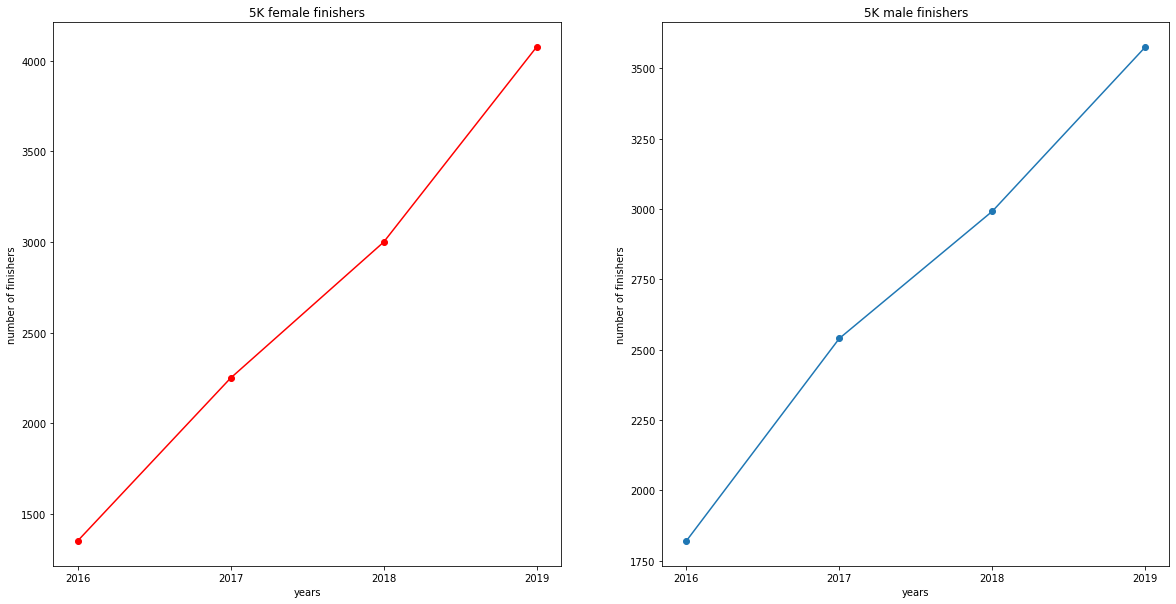

In [161]:
fig1, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,10))

ax1.set_title('5K female finishers')
ax1.set_xlabel('years')
ax1.set_ylabel('number of finishers')
ax1.scatter(['2016','2017','2018','2019'], female_finishers, color = 'red')
ax1.plot(['2016','2017','2018','2019'], female_finishers, 'r')

ax2.set_title('5K male finishers')
ax2.set_xlabel('years')
ax2.set_ylabel('number of finishers')
ax2.scatter(['2016','2017','2018','2019'], male_finishers)
ax2.plot(['2016','2017','2018','2019'], male_finishers)
plt.show()

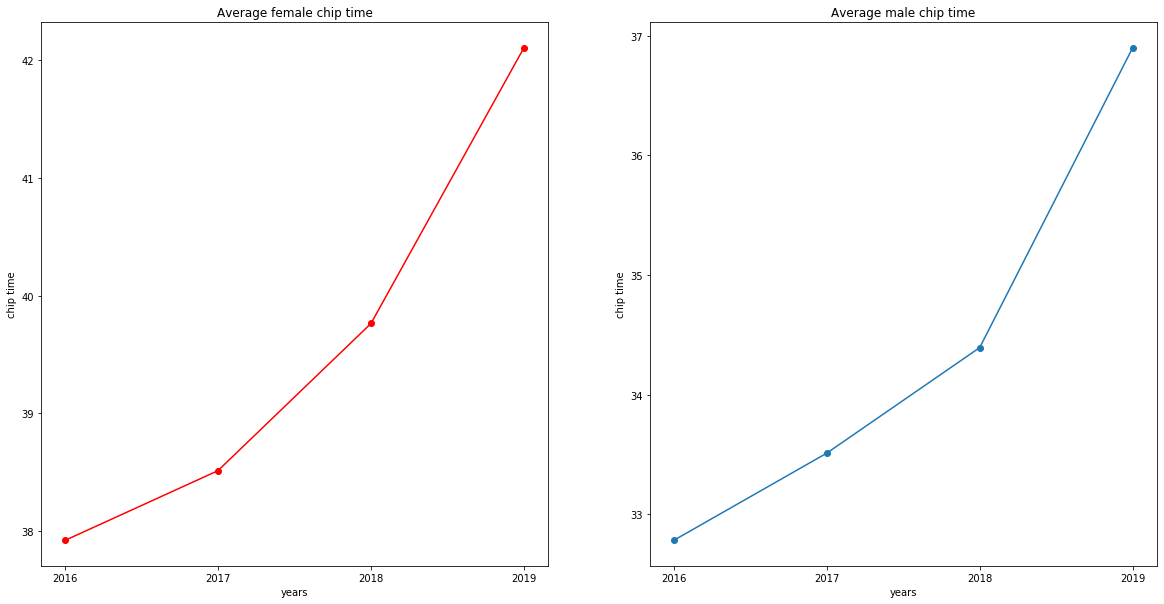

In [162]:
fig1, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,10))

ax1.set_title('Average female chip time')
ax1.set_xlabel('years')
ax1.set_ylabel('chip time')
ax1.scatter(['2016','2017','2018','2019'], female_avg, color='red')
ax1.plot(['2016','2017','2018','2019'], female_avg, 'r')

ax2.set_title('Average male chip time')
ax2.set_xlabel('years')
ax2.set_ylabel('chip time')
ax2.scatter(['2016','2017','2018','2019'], male_avg)
ax2.plot(['2016','2017','2018','2019'], male_avg)
ax2.set_xlabel = 'years'
ax2.set_ylabel = 'chip time'
plt.show()

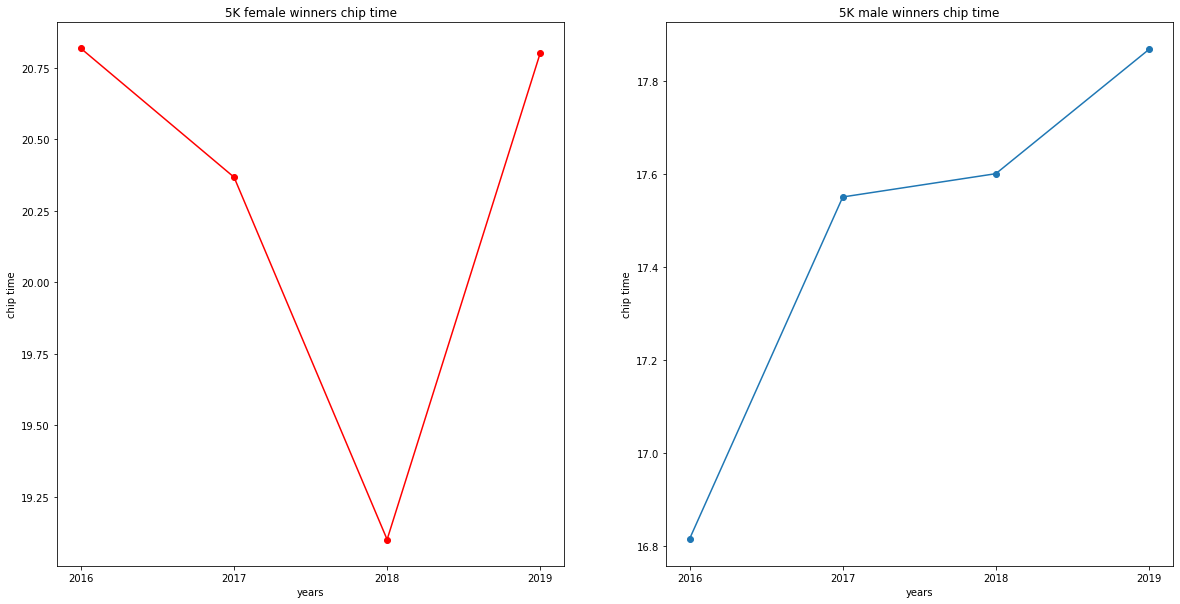

In [163]:
fig1, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,10))

ax1.set_title('5K female winners chip time')
ax1.set_xlabel('years')
ax1.set_ylabel('chip time')
ax1.scatter(['2016','2017','2018','2019'], top_female, color='red')
ax1.plot(['2016','2017','2018','2019'], top_female, 'r')

ax2.set_title('5K male winners chip time')
ax2.set_xlabel('years')
ax2.set_ylabel('chip time')
ax2.scatter(['2016','2017','2018','2019'], top_male)
ax2.plot(['2016','2017','2018','2019'], top_male)
ax2.set_xlabel = 'years'
ax2.set_ylabel = 'chip time'
plt.show()